In [1]:
# Project: Bankruptcy Prevention

# Timeline: 26th September to 31st October

# Business Objective:
# This is a classification project, since the variable to predict is binary 
# (bankruptcy or non-bankruptcy). 
# The goal here is to model the probability that a business goes bankrupt from different features.
# The data file contains 7 features about 250 companies
# The data set includes the following variables:
# 1.industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.
# 2.management_risk: 0=low risk, 0.5=medium risk, 1=high risk.
# 3.financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.
# 4.credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.
# 5.competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.
# 6.operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.
# 7.class: bankruptcy, non-bankruptcy (target variable).

In [2]:
# Import the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Load the dataset using pandas

df = pd.read_csv('Bankruptcy Prediction.csv')
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [4]:
# Exploratory data analysis

# Understanding the variables and their datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
# Top 5 records

df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [6]:
# Bottom 5 records

df.tail()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009
6818,0,0.493053,0.570105,0.549548,0.627409,0.627409,0.998080,0.801987,0.813800,0.313415,...,0.815956,0.000707,0.626680,0.627408,0.841019,0.275114,0.026793,0.565167,1,0.233902


In [7]:
# Analyzing variable statistics

df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [8]:
# Checking for null values

df.isnull()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6815,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6816,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6817,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [10]:
df.isnull().sum().sum()

0

In [11]:
# No null values are present in the dataset

In [12]:
# Identifying categorical variables

df_categorical_features = df.select_dtypes(include='category')
df_categorical_features

# There are no categorical variables in the dataset so might not need one 
# hot encoding or label encoding

""
0
1
2
3
4
...
6814
6815
6816
6817


In [13]:
# Identify numerical columns in the dataset.

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

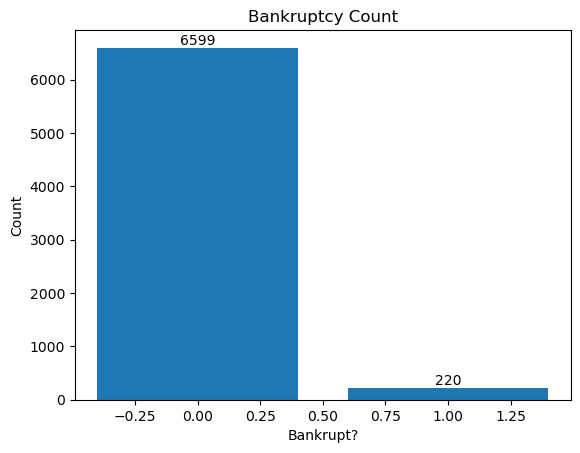

In [14]:
# Bankruptcy count bar chart

bankrupt_counts = df['Bankrupt?'].value_counts()
plt.bar(bankrupt_counts.index,bankrupt_counts.values)
plt.title('Bankruptcy Count')
plt.xlabel('Bankrupt?')
plt.ylabel('Count')

for index, value in enumerate(bankrupt_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

In [15]:
print('Percentage of bankrupt companies:',(220/6819)*100)
print('Percentage of non-bankrupt companies:',(6599/6819)*100)

Percentage of bankrupt companies: 3.2262795131250916
Percentage of non-bankrupt companies: 96.77372048687491


In [16]:
# Finding correlation between Bankrupt target variable and other variables

# Calculate correlation coefficients
correlation_matrix = df.corr()

bankrupt_correlation = correlation_matrix['Bankrupt?'].drop('Bankrupt?')

# Set a correlation threshold to select variables

correlation_threshold = 0.2

# Select variables with correlation above the threshold
selected_variables = bankrupt_correlation[abs(bankrupt_correlation) > correlation_threshold]

print(selected_variables)

 ROA(C) before interest and depreciation before interest   -0.260807
 ROA(A) before interest and % after tax                    -0.282941
 ROA(B) before interest and depreciation after tax         -0.273051
 Persistent EPS in the Last Four Seasons                   -0.219560
 Per Share Net profit before tax (Yuan ¥)                  -0.201395
 Debt ratio %                                               0.250161
 Net worth/Assets                                          -0.250161
 Net profit before tax/Paid-in capital                     -0.207857
 Retained Earnings to Total Assets                         -0.217779
 Net Income to Total Assets                                -0.315457
Name: Bankrupt?, dtype: float64


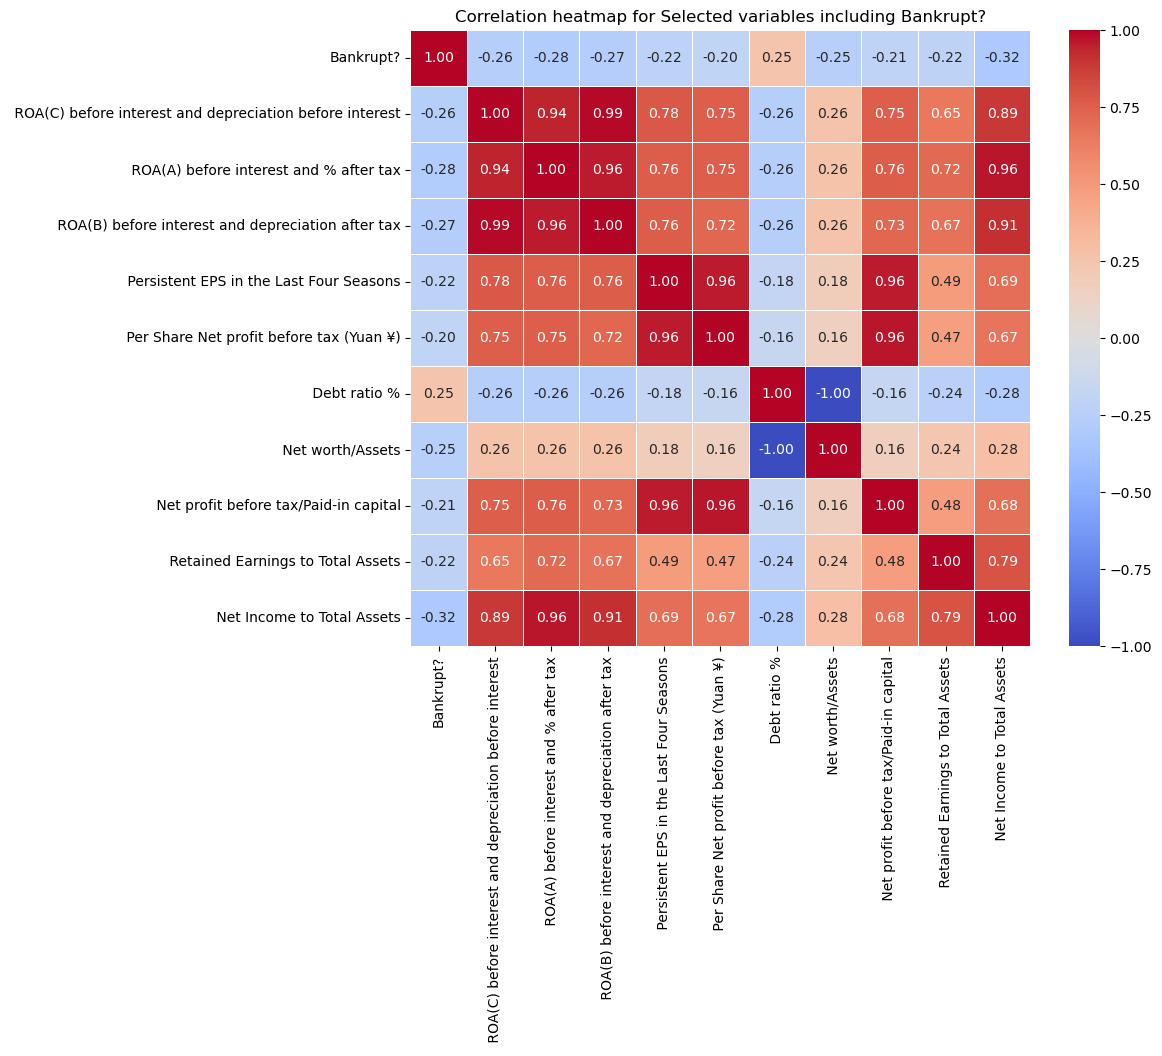

In [17]:
# Select variables with highest absolute correlation with Bankrupt? and above threshold 0.2

correlation_threshold = 0.2
selected_variables = correlation_matrix['Bankrupt?'][abs(correlation_matrix['Bankrupt?']) > correlation_threshold].index

# Create correlation matrix for the selected variables including Bankrupt?
selected_correlation_matrix = df[selected_variables].corr()

# Create heatmap for selected correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(selected_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation heatmap for Selected variables including Bankrupt?')
plt.show()

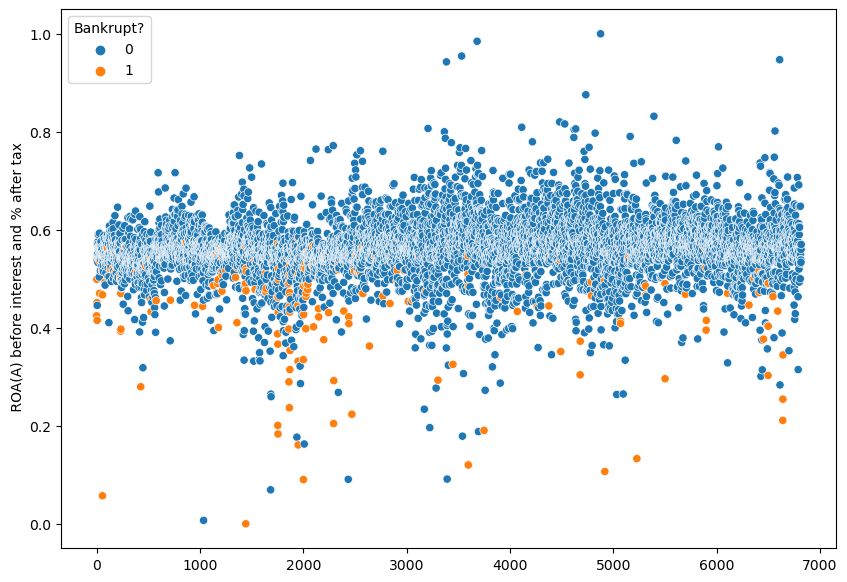

In [18]:
# Scatter plot for plotting ROA(A) before interest and %after tax samples

fig = plt.figure(figsize = (10,7))
sns.scatterplot(x = df.index, y = ' ROA(A) before interest and % after tax', hue = 'Bankrupt?', data=df)
plt.show()


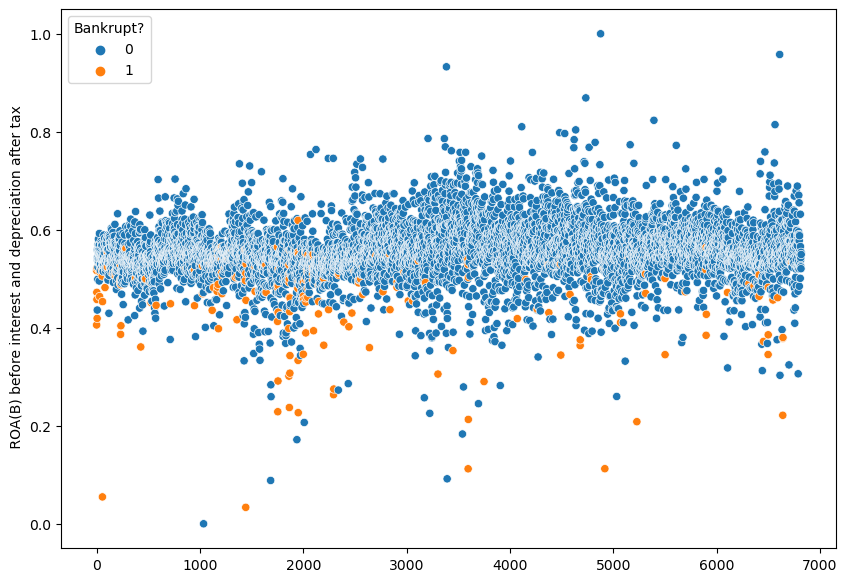

In [19]:
# Scatter plot for plotting ROA(B) before interest and depreciation after tax samples

fig = plt.figure(figsize = (10,7))
sns.scatterplot(x = df.index, y = ' ROA(B) before interest and depreciation after tax', hue = 'Bankrupt?', data=df)
plt.show()

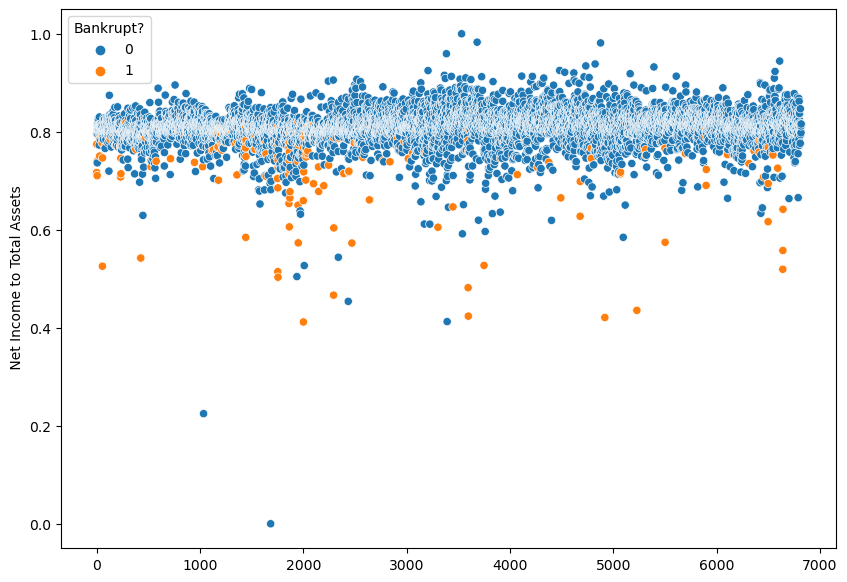

In [20]:
# Scatter plot for plotting Net Income to Total Assets

fig = plt.figure(figsize = (10,7))
sns.scatterplot(x = df.index, y = ' Net Income to Total Assets', hue = 'Bankrupt?', data=df)
plt.show()

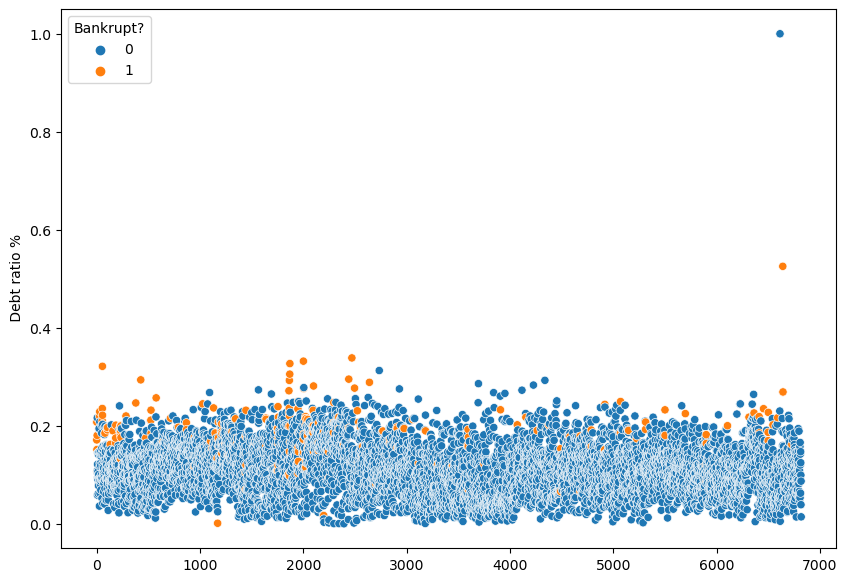

In [21]:
# Scatter plot for plotting Debt ratio % 

fig = plt.figure(figsize = (10,7))
sns.scatterplot(x = df.index, y = ' Debt ratio %', hue = 'Bankrupt?', data=df)
plt.show()

In [22]:
# Scatter plots insights

# Higher the ROA(A) before interest and % after tax, less chances are the company will be bankrupt
# Higher the ROA(B) before interest and depreciation after tax, less chances are the company will be bankrupt
# Higher the Net Income to Total Assets, less chances are the company will be bankrupt
# Higher the Debt ratio %, more chances are the company will be bankrupt

In [23]:
# Create the new DataFrame 'financial_data' with the selected columns
financial_data = df[
    [' ROA(C) before interest and depreciation before interest',
     ' ROA(A) before interest and % after tax',
     ' ROA(B) before interest and depreciation after tax',
     ' Persistent EPS in the Last Four Seasons',
     ' Per Share Net profit before tax (Yuan ¥)',
     ' Debt ratio %',
     ' Net worth/Assets',
     ' Net profit before tax/Paid-in capital',
     ' Retained Earnings to Total Assets',
     ' Net Income to Total Assets']
].copy()

# Print the first few rows of the new DataFrame to verify the data
financial_data.head(20)

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan ¥),Debt ratio %,Net worth/Assets,Net profit before tax/Paid-in capital,Retained Earnings to Total Assets,Net Income to Total Assets
0,0.370594,0.424389,0.405750,0.169141,0.138736,0.207576,0.792424,0.137757,0.903225,0.716845
1,0.464291,0.538214,0.516730,0.208944,0.169918,0.171176,0.828824,0.168962,0.931065,0.795297
2,0.426071,0.499019,0.472295,0.180581,0.142803,0.207516,0.792484,0.148036,0.909903,0.774670
3,0.399844,0.451265,0.457733,0.193722,0.148603,0.151465,0.848535,0.147561,0.906902,0.739555
4,0.465022,0.538432,0.522298,0.212537,0.168412,0.106509,0.893491,0.167461,0.913850,0.795016
5,0.388680,0.415177,0.419134,0.174435,0.138811,0.180427,0.819573,0.137825,0.903041,0.710420
6,0.390923,0.445704,0.436158,0.161482,0.128945,0.216102,0.783898,0.127939,0.911441,0.736619
7,0.508361,0.570922,0.559077,0.225206,0.180462,0.108202,0.891798,0.179519,0.935449,0.815350
8,0.488519,0.545137,0.543284,0.218398,0.173157,0.058591,0.941409,0.172159,0.935200,0.803647
9,0.495686,0.550916,0.542963,0.217831,0.176621,0.121293,0.878707,0.175658,0.938290,0.804195


In [24]:
financial_data.describe()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan ¥),Debt ratio %,Net worth/Assets,Net profit before tax/Paid-in capital,Retained Earnings to Total Assets,Net Income to Total Assets
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.505180,0.558625,0.553589,0.228813,0.184361,0.113177,0.886823,0.182715,0.934733,0.807760
std,0.060686,0.065620,0.061595,0.033263,0.033180,0.053920,0.053920,0.030785,0.025564,0.040332
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.476527,0.535543,0.527277,0.214711,0.170370,0.072891,0.851196,0.169376,0.931097,0.796750
50%,0.502706,0.559802,0.552278,0.224544,0.179709,0.111407,0.888593,0.178456,0.937672,0.810619
75%,0.535563,0.589157,0.584105,0.238820,0.193493,0.148804,0.927109,0.191607,0.944811,0.826455
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
# From the descriptive statistics, we can observe that all the variables appear to have been scaled between 0 and 1, 
# but they are not standardized with a mean of 0 and a standard deviation of 1. 
# The mean and standard deviation values are specific to each variable, and they provide information about the 
# central tendency and spread of the data for each variable. 
# The minimum and maximum values also show the range of values each variable can take.

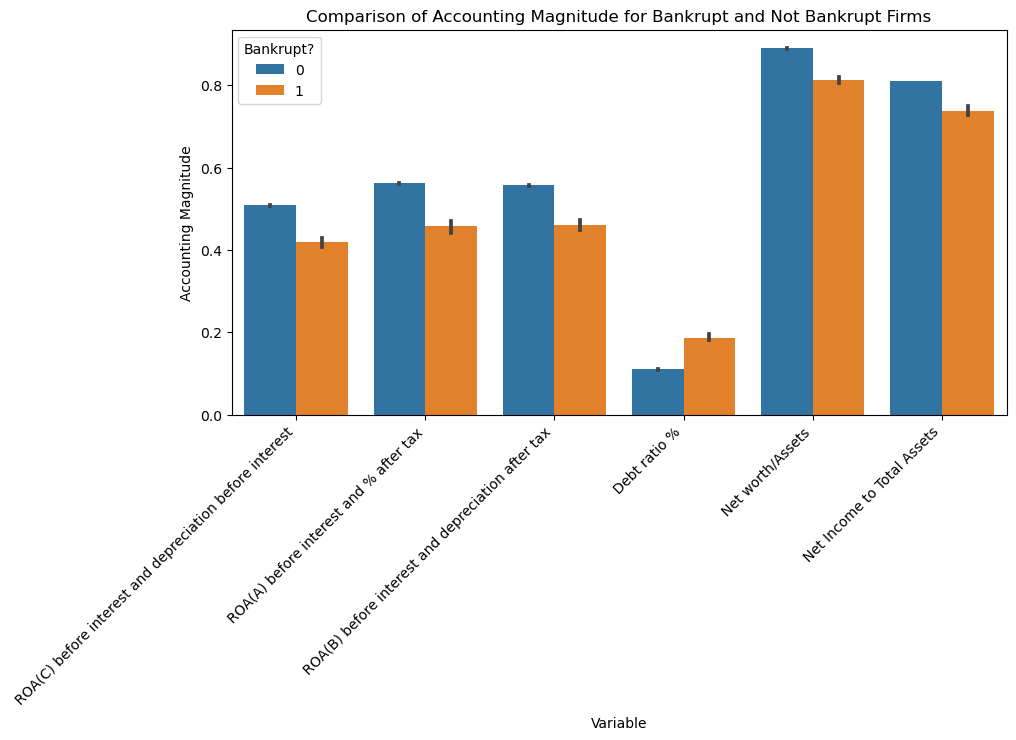

In [26]:
# Calculate the correlation coefficients
correlation_matrix = df.corr()

# Select the correlation between "Bankrupt?" and all other variables
bankrupt_correlation = correlation_matrix['Bankrupt?'].drop('Bankrupt?')

# Set a correlation threshold (absolute value) to select variables
correlation_threshold = 0.25

# Select variables with correlation above the threshold
selected_variables = bankrupt_correlation[abs(bankrupt_correlation) > correlation_threshold]

# Create a DataFrame containing only the selected variables and "Bankrupt?" column
selected_data = df[list(selected_variables.index) + ['Bankrupt?']]

# Melt the DataFrame to prepare for the bar plots
selected_data_melted = selected_data.melt(id_vars='Bankrupt?', var_name='Variable', value_name='Value')

# Plot the bar plots using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x='Variable', y='Value', hue='Bankrupt?', data=selected_data_melted)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Variable')
plt.ylabel('Accounting Magnitude')
plt.title('Comparison of Accounting Magnitude for Bankrupt and Not Bankrupt Firms')
plt.show()

In [27]:
# The series of bar plots visually compares the accounting magnitudes for each of the selected variables between two groups: 
# bankrupt firms (represented by the color 0) and firms that are not bankrupt (represented by the color 1). 
# By examining the bars for each variable, we can observe how the accounting magnitude differs between bankrupt and non-bankrupt
# firms for the selected variables. If the bars for a particular variable show a significant difference between the two groups, 
# it may suggest that the variable is important in distinguishing bankrupt and non-bankrupt firms based on accounting metrics.

# Overall, this visualization provides valuable insights into the relationship between the selected accounting variables and 
# the likelihood of bankruptcy for the analyzed firms.

In [28]:
# Calculate skewness for numerical columns
skewness = financial_data.skew()

print('Skewness for numerical_columns:')
print(skewness)

Skewness for numerical_columns:
 ROA(C) before interest and depreciation before interest    -0.323941
 ROA(A) before interest and % after tax                     -1.033727
 ROA(B) before interest and depreciation after tax          -0.763564
 Persistent EPS in the Last Four Seasons                     5.135963
 Per Share Net profit before tax (Yuan ¥)                    6.002590
 Debt ratio %                                                0.980796
 Net worth/Assets                                           -0.980796
 Net profit before tax/Paid-in capital                       6.379426
 Retained Earnings to Total Assets                         -11.139574
 Net Income to Total Assets                                 -3.684097
dtype: float64


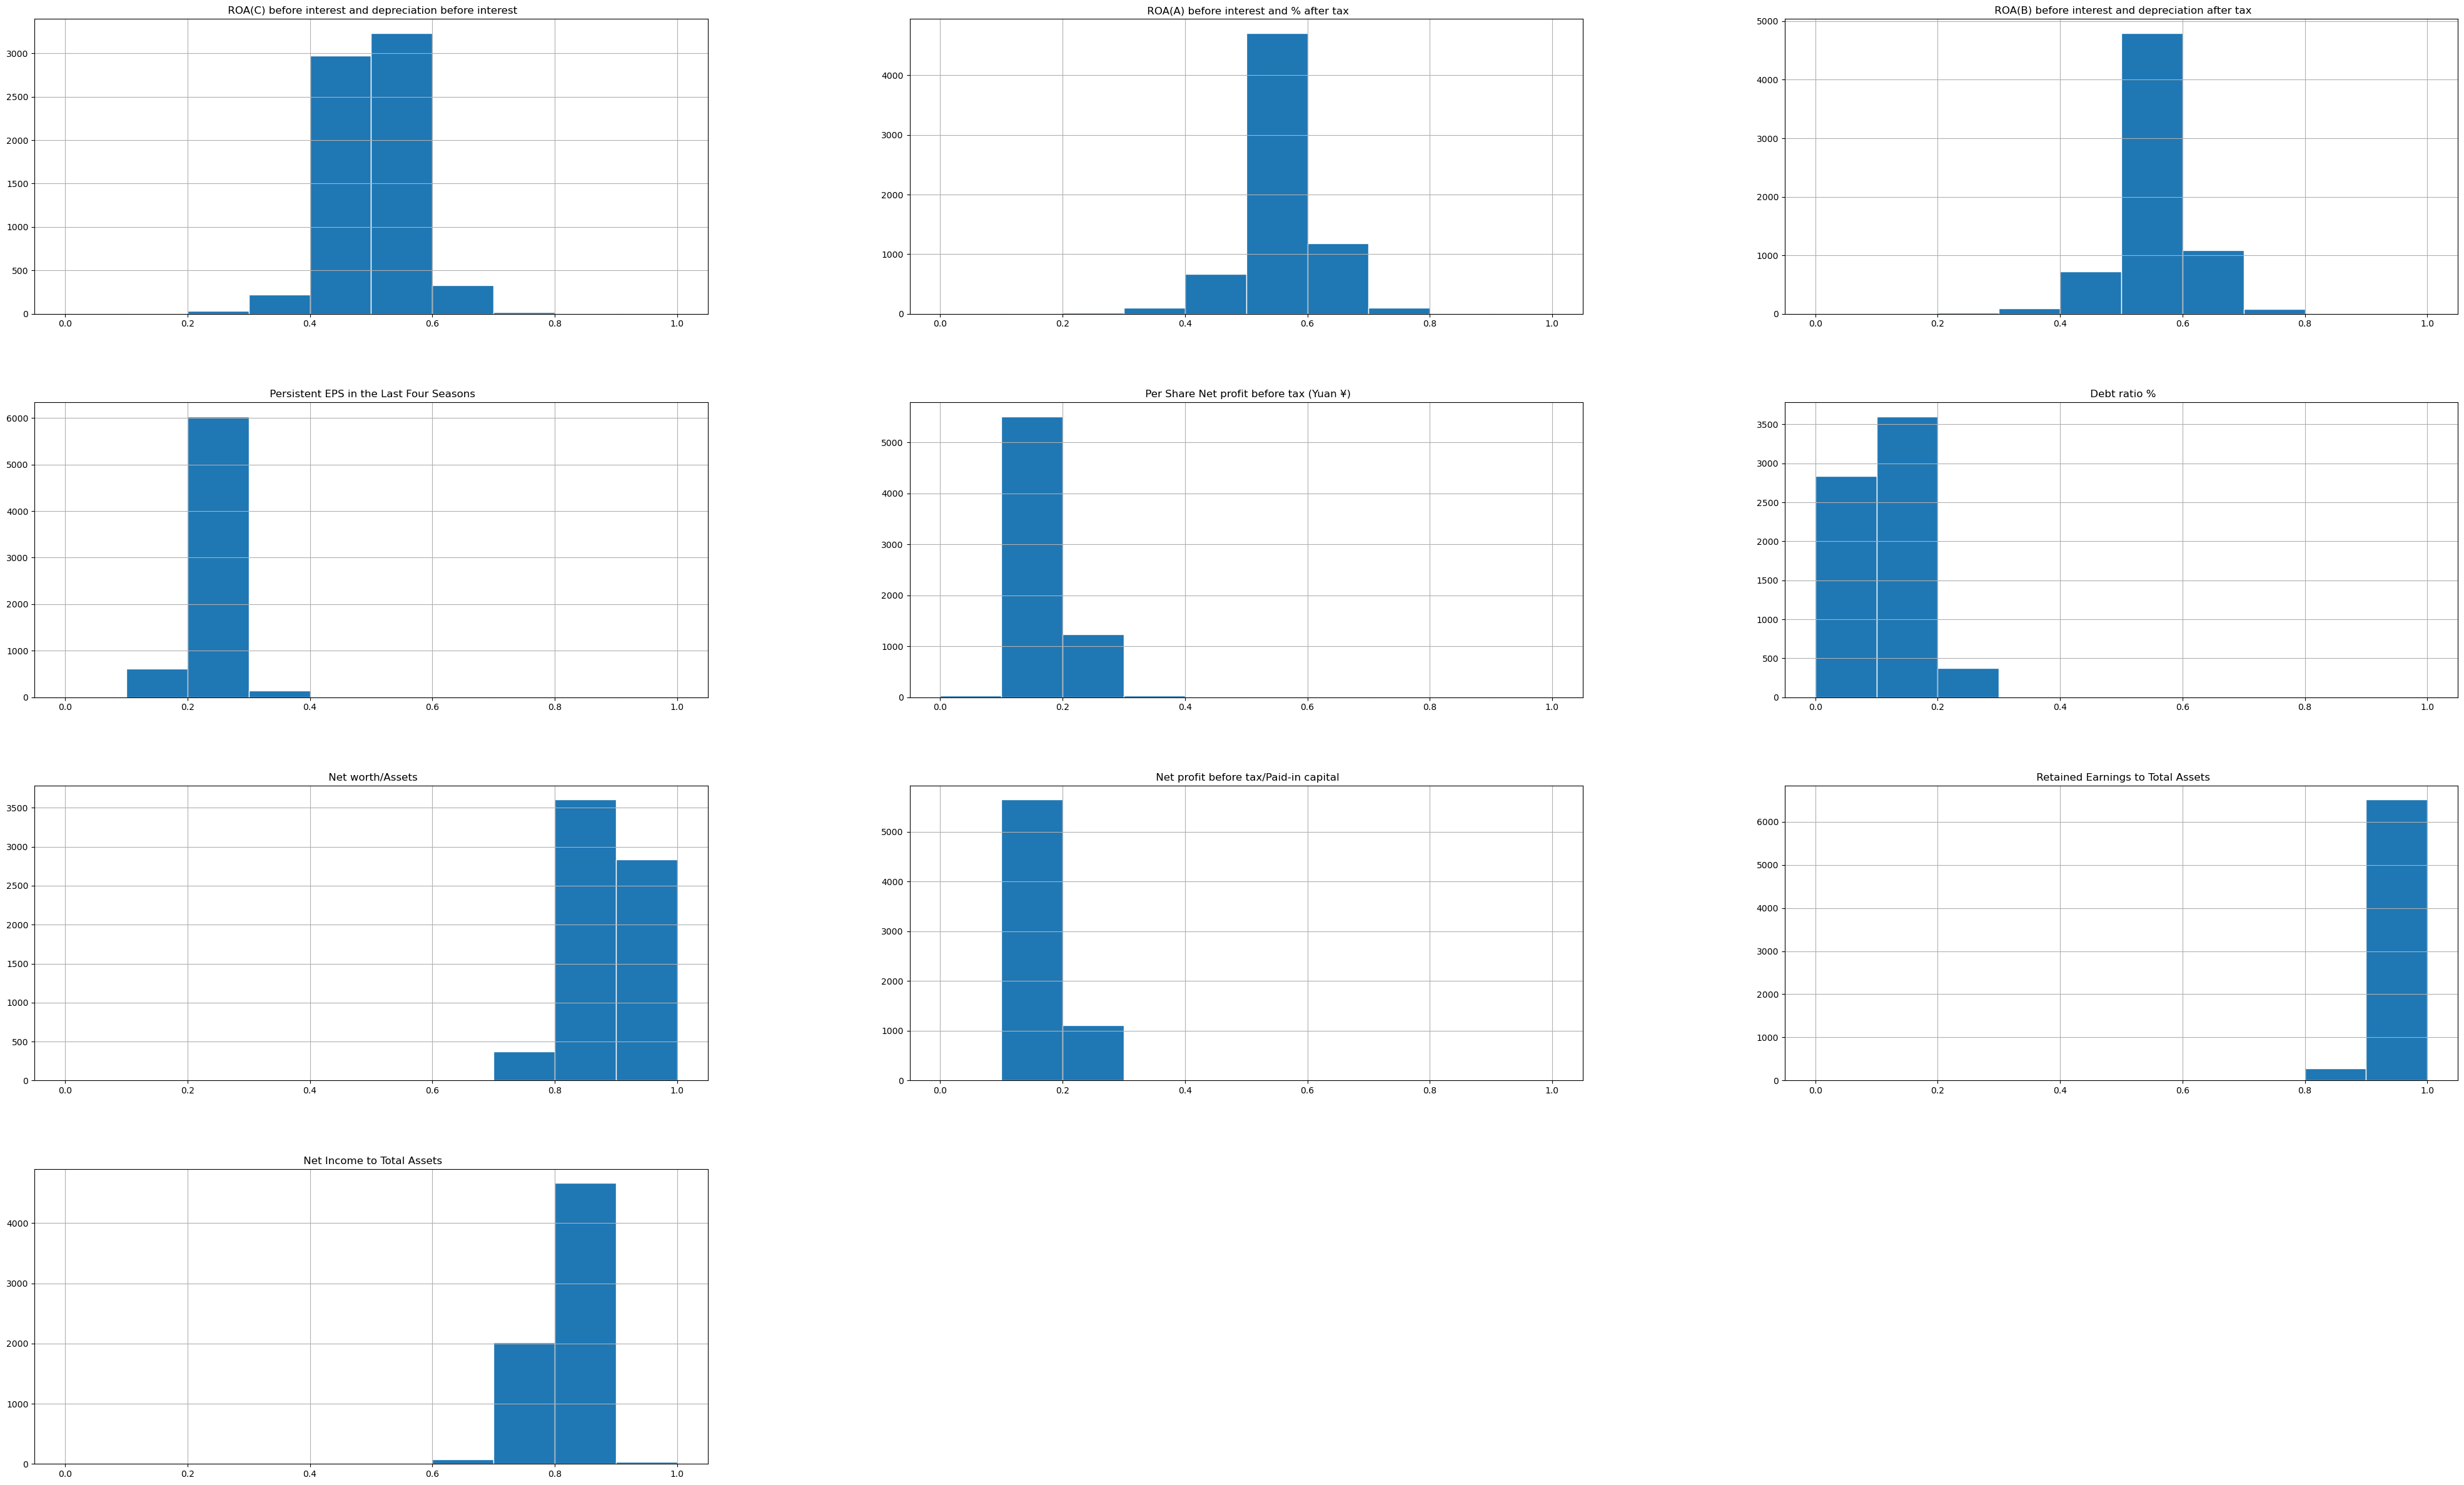

In [29]:
financial_data.hist(figsize=(50,30), edgecolor='white')
plt.show()

In [30]:
# SMOTE for Handling Class Imbalance

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 1: Separate features and target
X = df.drop(columns=['Bankrupt?'])  # 'target' is your label for bankruptcy
y = df['Bankrupt?']

# Step 2: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Class distribution after SMOTE:\n", pd.Series(y_train_smote).value_counts())

Class distribution after SMOTE:
 0    5279
1    5279
Name: Bankrupt?, dtype: int64


In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Step 2: Apply PCA
pca = PCA(n_components=0.95)  # Choose enough components to explain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 3: Check the shape of the reduced data
print("Original shape:", X_train_smote.shape)
print("Reduced shape:", X_train_pca.shape)

Original shape: (10558, 95)
Reduced shape: (10558, 48)


In [32]:
# MODEL BUILDING

# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Step 1: Initialize the model
log_reg = LogisticRegression(random_state=42)

# Step 2: Train the model
log_reg.fit(X_train_pca, y_train_smote)

# Step 3: Make predictions
y_pred = log_reg.predict(X_test_pca)

# Step 4: Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred))

Logistic Regression Accuracy: 0.8848973607038123
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94      1320
           1       0.19      0.77      0.30        44

    accuracy                           0.88      1364
   macro avg       0.59      0.83      0.62      1364
weighted avg       0.97      0.88      0.92      1364

AUC Score: 0.8306818181818182


C:\Users\mihir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Step 1: Initialize the model
rf = RandomForestClassifier(random_state=42)

# Step 2: Train the model
rf.fit(X_train_pca, y_train_smote)

# Step 3: Make predictions
y_pred_rf = rf.predict(X_test_pca)

# Step 4: Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("AUC Score:", roc_auc_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9494134897360704
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      1320
           1       0.30      0.43      0.36        44

    accuracy                           0.95      1364
   macro avg       0.64      0.70      0.66      1364
weighted avg       0.96      0.95      0.95      1364

AUC Score: 0.6992424242424243


In [34]:
# Xgboost
import xgboost as xgb

# Step 1: Initialize the model
xgb_model = xgb.XGBClassifier(random_state=42)

# Step 2: Train the model
xgb_model.fit(X_train_pca, y_train_smote)

# Step 3: Make predictions
y_pred_xgb = xgb_model.predict(X_test_pca)

# Step 4: Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("AUC Score:", roc_auc_score(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9464809384164223
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      1320
           1       0.32      0.59      0.42        44

    accuracy                           0.95      1364
   macro avg       0.65      0.77      0.69      1364
weighted avg       0.96      0.95      0.95      1364

AUC Score: 0.7746212121212122


In [35]:
# SVM
from sklearn.svm import SVC

# Step 1: Initialize the model
svm_model = SVC(random_state=42)

# Step 2: Train the model
svm_model.fit(X_train_pca, y_train_smote)

# Step 3: Make predictions
y_pred_svm = svm_model.predict(X_test_pca)

# Step 4: Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("AUC Score:", roc_auc_score(y_test, y_pred_svm))

SVM Accuracy: 0.9112903225806451
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95      1320
           1       0.21      0.61      0.31        44

    accuracy                           0.91      1364
   macro avg       0.60      0.77      0.63      1364
weighted avg       0.96      0.91      0.93      1364

AUC Score: 0.7674242424242426


In [36]:
# SGD Classifier

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Train a SGDClassifier on the resampled and scaled data

# Step 1: Initialize the model
sgd = SGDClassifier(random_state=42)
# Step 2: Train the model
sgd.fit(X_train_pca, y_train_smote)

# Step 3: Make predictions on the test set
y_pred_sgd = sgd.predict(X_test_pca)

# Step 4: Evaluate the model
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sgd))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_sgd))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred_sgd)
print("\nAccuracy Score:", accuracy)

Confusion Matrix:
 [[1148  172]
 [  13   31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.87      0.93      1320
           1       0.15      0.70      0.25        44

    accuracy                           0.86      1364
   macro avg       0.57      0.79      0.59      1364
weighted avg       0.96      0.86      0.90      1364


Accuracy Score: 0.8643695014662757


In [37]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
# Train a DecisionTreeClassifier on the resampled and scaled data

# Step 1: Initialize the model
dtc = DecisionTreeClassifier(random_state=42)
# Step 2: Trian the model
dtc.fit(X_train_pca, y_train_smote)

# Step 3: Make predictions on the test set
y_pred_dtc = dtc.predict(X_test_pca)

# Step 4: Evaluate the model
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtc))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_dtc))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred_dtc)
print("\nAccuracy Score:", accuracy)

Confusion Matrix:
 [[1226   94]
 [  22   22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95      1320
           1       0.19      0.50      0.27        44

    accuracy                           0.91      1364
   macro avg       0.59      0.71      0.61      1364
weighted avg       0.96      0.91      0.93      1364


Accuracy Score: 0.9149560117302052


In [38]:
# Model comparison
results = {
    'Logistic Regression': [accuracy_score(y_test, y_pred), roc_auc_score(y_test, y_pred)],
    'Random Forest': [accuracy_score(y_test, y_pred_rf), roc_auc_score(y_test, y_pred_rf)],
    'XGBoost': [accuracy_score(y_test, y_pred_xgb), roc_auc_score(y_test, y_pred_xgb)],
    'SVM': [accuracy_score(y_test, y_pred_svm), roc_auc_score(y_test, y_pred_svm)],
    'Decision Tree': [accuracy_score(y_test, y_pred_dtc), roc_auc_score(y_test, y_pred_dtc)],
    'SGD Classifier': [accuracy_score(y_test, y_pred_sgd), roc_auc_score(y_test, y_pred_sgd)],
}

for model, scores in results.items():
    print(f"{model} - Accuracy: {scores[0]:.4f}, AUC: {scores[1]:.4f}")

Logistic Regression - Accuracy: 0.8849, AUC: 0.8307
Random Forest - Accuracy: 0.9494, AUC: 0.6992
XGBoost - Accuracy: 0.9465, AUC: 0.7746
SVM - Accuracy: 0.9113, AUC: 0.7674
Decision Tree - Accuracy: 0.9150, AUC: 0.7144
SGD Classifier - Accuracy: 0.8644, AUC: 0.7871


In [39]:
# Initialize models
#Various regression models are initialized, including both linear models with regularization (Lasso and Ridge),
#ensemble methods (Random Forest, AdaBoost, XGBoost), and a support vector machine.

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'XGB Classifier': xgb.XGBClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'SGD Classifier': SGDClassifier(random_state=42),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42)
}

In [46]:
# Train and evaluate models

from sklearn.metrics import r2_score, mean_squared_error
for name, model in models.items():
    model.fit(X_train_pca, y_train_smote)
    y_pred = model.predict(X_test_pca)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f'{name}:')
    print(f'R²: {r2:.4f}')
    print(f'RMSE: {rmse:.4f}\n')

C:\Users\mihir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
R²: -2.6871
RMSE: 0.3393

Random Forest Classifier:
R²: -0.6205
RMSE: 0.2249

XGB Classifier:
R²: -0.7144
RMSE: 0.2313

SVC:
R²: -1.8417
RMSE: 0.2978

SGD Classifier:
R²: -3.3447
RMSE: 0.3683

Decision Tree Classifier:
R²: -1.7242
RMSE: 0.2916



Tuning hyperparameters for Logistic Regression...


C:\Users\mihir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best parameters for Logistic Regression: {}
Logistic Regression - MSE: 0.0411, R²: -0.3152, RMSE: 0.2026

Tuning hyperparameters for Random Forest Classifier...
Best parameters for Random Forest Classifier: {}
Random Forest Classifier - MSE: 0.0286, R²: 0.0841, RMSE: 0.1691

Tuning hyperparameters for XGB Classifier...
Best parameters for XGB Classifier: {}
XGB Classifier - MSE: 0.0286, R²: 0.0841, RMSE: 0.1691

Tuning hyperparameters for SVC...
Best parameters for SVC: {}
SVC - MSE: 0.0323, R²: -0.0333, RMSE: 0.1796

Tuning hyperparameters for SGD Classifier...
Best parameters for SGD Classifier: {}
SGD Classifier - MSE: 0.0389, R²: -0.2447, RMSE: 0.1971

Tuning hyperparameters for Decision Tree Classifier...
Best parameters for Decision Tree Classifier: {}
Decision Tree Classifier - MSE: 0.0389, R²: -0.2447, RMSE: 0.1971



C:\Users\mihir\AppData\Local\Temp\ipykernel_11236\1855867775.py:84: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(model_names, rotation=45, ha='right')
C:\Users\mihir\AppData\Local\Temp\ipykernel_11236\1855867775.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(model_names, rotation=45, ha='right')
C:\Users\mihir\AppData\Local\Temp\ipykernel_11236\1855867775.py:98: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(model_names, rotation=45, ha='right')


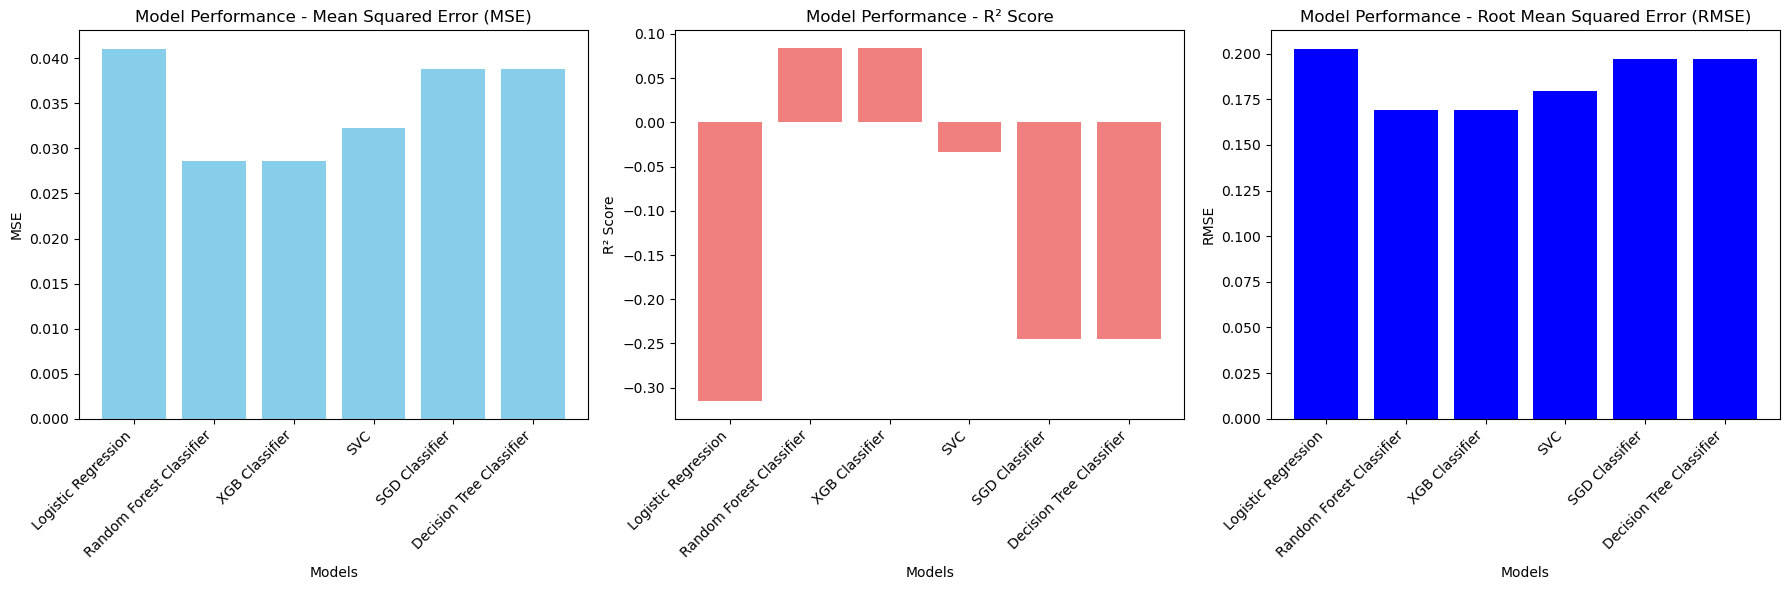

In [49]:
# Dictionary to store best models and their results

from sklearn.model_selection import GridSearchCV

best_models = {}
results = {}

# Standardize features for models that need it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_test_scaled = scaler.transform(X_test_pca)

# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
    },
    'Random Forest Classifier': {
    },
    'XGB Classifier': {
    },
    'SVC': {
    },
    'SGD Classifier': {
    },
    'Decision Tree Classifier': {
    }
}

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'XGB Classifier': xgb.XGBClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'SGD Classifier': SGDClassifier(random_state=42),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42)
}

# Perform GridSearchCV for each model
for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")

    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Store the best model and its results
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model

    # Make predictions
    if model_name in ['Linear Regression', 'Lasso Regression', 'Ridge Regression']:
        predictions = best_model.predict(X_test_scaled)
    else:
        predictions = best_model.predict(X_test)

    # Evaluate model performance
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    rmse = np.sqrt(mse)

    # Store results
    results[model_name] = {'MSE': mse, 'R2': r2, 'RMSE': rmse, 'Best Params': grid_search.best_params_}
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"{model_name} - MSE: {mse:.4f}, R²: {r2:.4f}, RMSE: {rmse:.4f}\n")

# Visualize the results using a bar plot
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Extracting values for plotting
model_names = list(results.keys())
mse_values = [metrics['MSE'] for metrics in results.values()]
r2_values = [metrics['R2'] for metrics in results.values()]
rmse_values = [metrics['RMSE'] for metrics in results.values()]

# Create a figure with subplots for MSE,RMSE and R²
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot MSE values
ax[0].bar(model_names, mse_values, color='skyblue')
ax[0].set_title('Model Performance - Mean Squared Error (MSE)')
ax[0].set_xlabel('Models')
ax[0].set_ylabel('MSE')
ax[0].set_xticklabels(model_names, rotation=45, ha='right')

# Plot R² values
ax[1].bar(model_names, r2_values, color='lightcoral')
ax[1].set_title('Model Performance - R² Score')
ax[1].set_xlabel('Models')
ax[1].set_ylabel('R² Score')
ax[1].set_xticklabels(model_names, rotation=45, ha='right')

# Plot RMSE values
ax[2].bar(model_names, rmse_values, color='blue')
ax[2].set_title('Model Performance - Root Mean Squared Error (RMSE)')
ax[2].set_xlabel('Models')
ax[2].set_ylabel('RMSE')
ax[2].set_xticklabels(model_names, rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

In [40]:
# The model has been built and evaluated using 6 different algorithms
# Random Forest and XGBoost are the 2 best algorithms with highest accuracy score and lowest errors
# Out of them Random Forest has the highest accuracy score and the best fit for this dataset